In [1]:
# append parent directory to path for jupyter
import sys
sys.path.insert(1,"../")

from src.load_datasets import get_mnist_loader, get_fmnist_loader
from src.utils import seed_everything

seed = 1

seed_everything(seed)

In [2]:
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [4]:

batch_size = 1024
dataset = "mnist"
data_dir = "../data"

logger.info(f"Loading {dataset} dataset with batch size {batch_size}")

if dataset == "mnist":
    trainloader, testloader = get_mnist_loader(data_dir, batch_size=batch_size)
elif dataset == "fmnist":
    trainloader, testloader = get_fmnist_loader(data_dir, batch_size=batch_size)
else:
    logger.error(f"Dataset must be either 'mnist' or 'fmnist' ")

2024-10-01 01:56:20,104 - INFO - Loading mnist dataset with batch size 1024


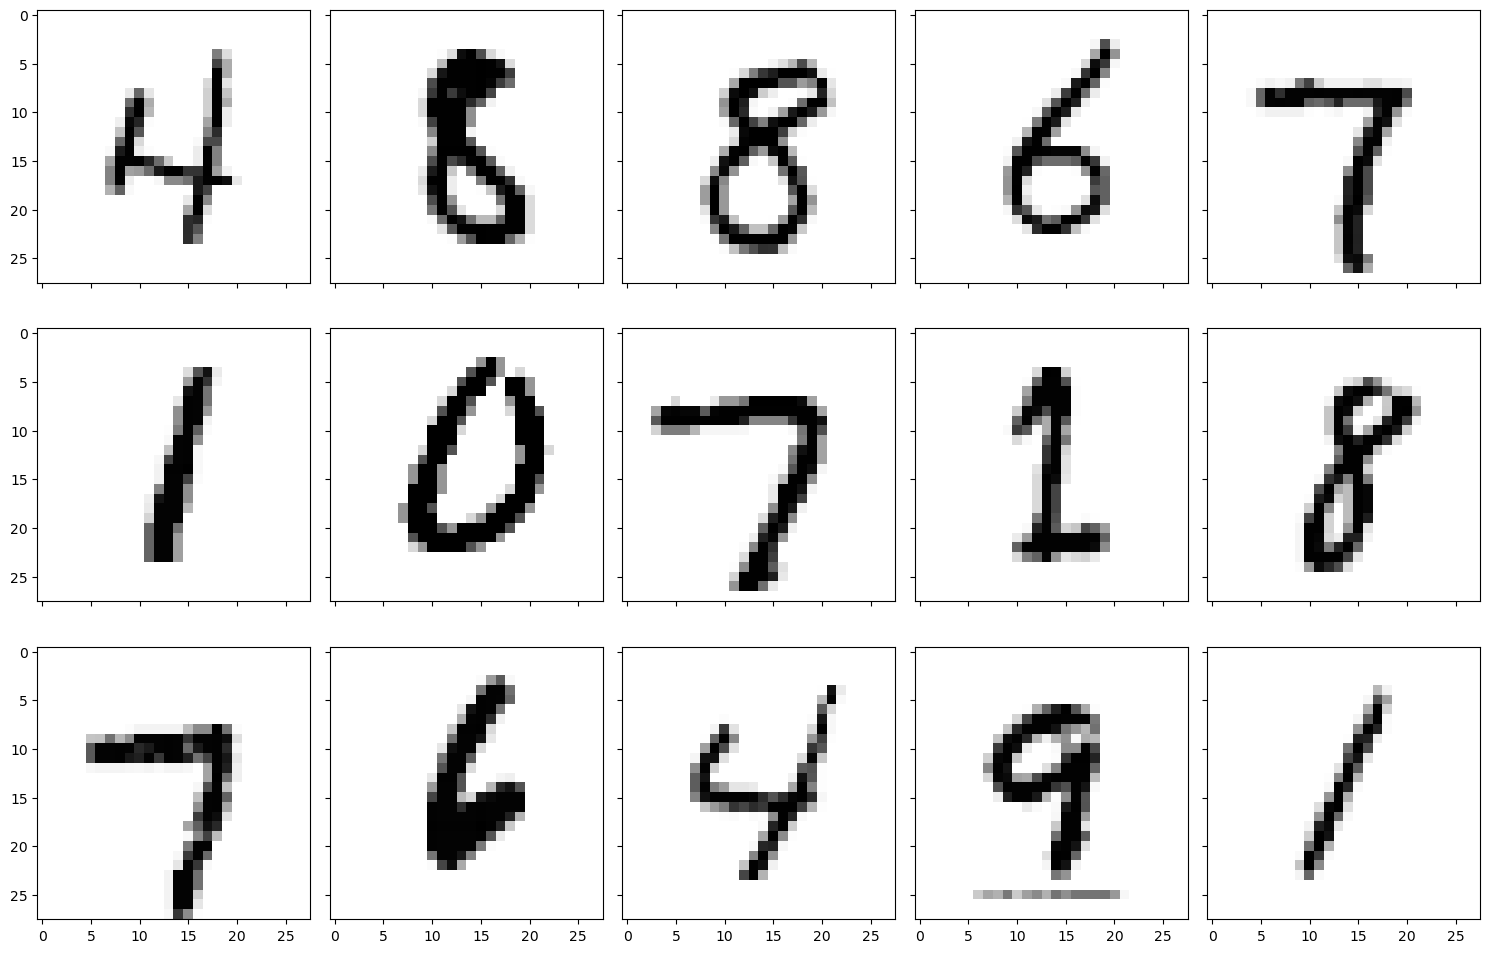

In [5]:
import matplotlib.pyplot as plt

# visualize data from trainloader
x, y = next(iter(trainloader))

fig, axs = plt.subplots(3, 5, figsize=(15,10), sharex=True, sharey=True)
axs = axs.flatten()
for ax, i in zip(axs, x):
    ax.imshow(i.permute(1,2,0), cmap="Greys")

plt.tight_layout()
plt.show()

In [6]:
from src.train import Trainer
import torch
from src.models import Autoencoder

# model params
img_height, img_width = 28, 28
hidden_dim = 64
latent_dim = 8
n_layers = 3
layernorm = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Autoencoder(img_height, img_width, hidden_dim, latent_dim, n_layers, layernorm=layernorm)
model = model.to(device)


# training params
learning_rate = 1e-2
weight_decay = 1e-2
train_epochs = 10

# Training loop
warmup_epochs = 5
max_lr = 0.001

trainer = Trainer(model, trainloader, testloader, logger)
results = trainer.train(learning_rate=learning_rate, 
                        weight_decay=weight_decay, 
                        warmup_epochs=warmup_epochs, 
                        max_lr=max_lr, 
                        train_epochs=train_epochs, 
                        device=device)


2024-10-01 01:56:31,751 - INFO - Setting up Optimizer and Scheduler
2024-10-01 01:56:39,471 - INFO - epoch: 0	Train loss: 0.000507	Val loss: 0.000357	learning rate: 0.000345
2024-10-01 01:56:47,018 - INFO - epoch: 1	Train loss: 0.000328	Val loss: 0.000321	learning rate: 0.000655
2024-10-01 01:56:54,624 - INFO - epoch: 2	Train loss: 0.000308	Val loss: 0.000308	learning rate: 0.000905
2024-10-01 01:57:02,160 - INFO - epoch: 3	Train loss: 0.000298	Val loss: 0.000300	learning rate: 0.001000
2024-10-01 01:57:09,747 - INFO - epoch: 4	Train loss: 0.000290	Val loss: 0.000291	learning rate: 0.000905


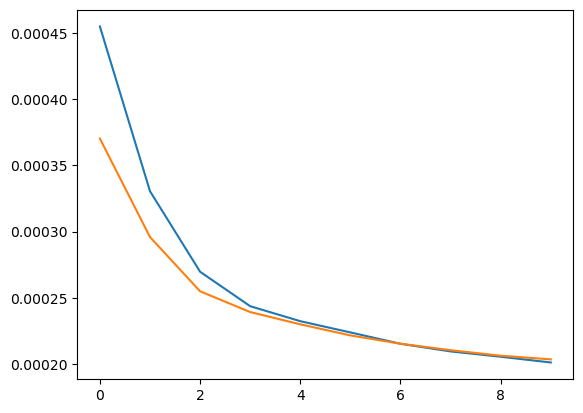

In [9]:
plt.plot(results["train_loss"])
plt.plot(results["val_loss"])
plt.show()